In [378]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns



In [379]:
# Reading the cvs file : Historical Data
hd=pd.read_csv('historical_data.csv')

In [380]:
# Reading the cvs file : fear_greed_index
fgindex=pd.read_csv('fear_greed_index.csv')

In [381]:
# Print the top 5 rows from historical data
hd.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [382]:
# Print the top 5 rows from fear greed index
fgindex.head(5)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [383]:
hd.shape

(211224, 16)

In [384]:
fgindex.shape

(2644, 4)

In [385]:
fgindex.describe

<bound method NDFrame.describe of        timestamp  value classification        date
0     1517463000     30           Fear  2018-02-01
1     1517549400     15   Extreme Fear  2018-02-02
2     1517635800     40           Fear  2018-02-03
3     1517722200     24   Extreme Fear  2018-02-04
4     1517808600     11   Extreme Fear  2018-02-05
...          ...    ...            ...         ...
2639  1745818200     54        Neutral  2025-04-28
2640  1745904600     60          Greed  2025-04-29
2641  1745991000     56          Greed  2025-04-30
2642  1746077400     53        Neutral  2025-05-01
2643  1746163800     67          Greed  2025-05-02

[2644 rows x 4 columns]>

In [386]:
hd.dtypes

Account              object
Coin                 object
Execution Price     float64
Size Tokens         float64
Size USD            float64
Side                 object
Timestamp IST        object
Start Position      float64
Direction            object
Closed PnL          float64
Transaction Hash     object
Order ID              int64
Crossed                bool
Fee                 float64
Trade ID            float64
Timestamp           float64
dtype: object

In [387]:
datatypes = fgindex.dtypes

datatypes

timestamp          int64
value              int64
classification    object
date              object
dtype: object

In [388]:
# Print the data types of single column

fgindex.dtypes['date']
hd.dtypes['Timestamp IST']

# In result we found that timestamp IST is object data type and date is also object data type

dtype('O')

In [389]:
fgindex['date'] = pd.to_datetime(fgindex['date'], errors='coerce')
print(fgindex)

       timestamp  value classification       date
0     1517463000     30           Fear 2018-02-01
1     1517549400     15   Extreme Fear 2018-02-02
2     1517635800     40           Fear 2018-02-03
3     1517722200     24   Extreme Fear 2018-02-04
4     1517808600     11   Extreme Fear 2018-02-05
...          ...    ...            ...        ...
2639  1745818200     54        Neutral 2025-04-28
2640  1745904600     60          Greed 2025-04-29
2641  1745991000     56          Greed 2025-04-30
2642  1746077400     53        Neutral 2025-05-01
2643  1746163800     67          Greed 2025-05-02

[2644 rows x 4 columns]


In [390]:
hd['Timestamp IST'] = pd.to_datetime(hd['Timestamp IST'], errors='coerce')
print(hd)

                                           Account      Coin  Execution Price  \
0       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9769   
1       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9800   
2       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9855   
3       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9874   
4       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9894   
...                                            ...       ...              ...   
211219  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211220  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211221  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211222  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211223  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   

        Size Tokens  Size U

In [391]:
# Extracting date (without time) from 'Timestamp IST' column , creating new column called as 'Date'

hd['Date'] = hd['Timestamp IST'].dt.date
hd['Date'] = pd.to_datetime(hd['Date'])  # converting new column datatype from object to datetime64[ns]

In [392]:
hd.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12


In [393]:
# Missing values before cleaning 

print(hd.isnull().sum())

Account                  0
Coin                     0
Execution Price          0
Size Tokens              0
Size USD                 0
Side                     0
Timestamp IST       131999
Start Position           0
Direction                0
Closed PnL               0
Transaction Hash         0
Order ID                 0
Crossed                  0
Fee                      0
Trade ID                 0
Timestamp                0
Date                131999
dtype: int64


In [394]:
print(fgindex.isnull().sum())

timestamp         0
value             0
classification    0
date              0
dtype: int64


In [395]:
hd= hd.dropna(subset=['Date'])

In [396]:
print(hd.isnull().sum())

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
Date                0
dtype: int64


In [397]:
hd.dtypes

Account                     object
Coin                        object
Execution Price            float64
Size Tokens                float64
Size USD                   float64
Side                        object
Timestamp IST       datetime64[ns]
Start Position             float64
Direction                   object
Closed PnL                 float64
Transaction Hash            object
Order ID                     int64
Crossed                       bool
Fee                        float64
Trade ID                   float64
Timestamp                  float64
Date                datetime64[ns]
dtype: object

In [398]:
fgindex.dtypes

timestamp                  int64
value                      int64
classification            object
date              datetime64[ns]
dtype: object

In [399]:
# Renaming the 'date' to 'Date' and 'Classification' into 'Sentiment' ,because historical_Dataset contains 'Date' column and it is essential to have same name of 'Date' column in both data sets to merge them properly


fgindex.rename(columns={
    'date': 'Date',
    'classification': 'Sentiment'
}, inplace=True)

fgindex.head(5)


,timestamp,value,Sentiment,Date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [400]:
# Merging the datasets on Date column 

merged_data = hd.merge(fgindex[['Date', 'Sentiment']], on='Date', how='left')


In [401]:
print(merged_data[['Date', 'Sentiment']].head(5))


        Date Sentiment
0 2024-02-12     Greed
1 2024-02-12     Greed
2 2024-02-12     Greed
3 2024-02-12     Greed
4 2024-02-12     Greed


In [402]:
print(merged_data.isnull().sum())

Account                 0
Coin                    0
Execution Price         0
Size Tokens             0
Size USD                0
Side                    0
Timestamp IST           0
Start Position          0
Direction               0
Closed PnL              0
Transaction Hash        0
Order ID                0
Crossed                 0
Fee                     0
Trade ID                0
Timestamp               0
Date                    0
Sentiment           43361
dtype: int64


In [403]:
merged_data.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,Sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,Greed


In [404]:
print(hd['Date'].dtype)
print(fgindex['Date'].dtype)


datetime64[ns]
datetime64[ns]


In [405]:
matched_dates = hd['Date'].isin(fgindex['Date']).sum()
total_dates = hd['Date'].nunique()
print(f"Matched Dates: {matched_dates}, Unique Trader Dates: {total_dates}")


Matched Dates: 35864, Unique Trader Dates: 188


In [406]:
missing_dates = hd[~hd['Date'].isin(fgindex['Date'])]['Date'].unique()
print("Unmatched sample dates:", sorted(missing_dates)[-10:])


Unmatched sample dates: [Timestamp('2025-10-03 00:00:00'), Timestamp('2025-10-04 00:00:00'), Timestamp('2025-11-01 00:00:00'), Timestamp('2025-11-02 00:00:00'), Timestamp('2025-11-03 00:00:00'), Timestamp('2025-11-04 00:00:00'), Timestamp('2025-12-01 00:00:00'), Timestamp('2025-12-02 00:00:00'), Timestamp('2025-12-03 00:00:00'), Timestamp('2025-12-04 00:00:00')]


In [407]:
print(fgindex['Date'].min(), fgindex['Date'].max())


2018-02-01 00:00:00 2025-05-02 00:00:00


In [408]:
print(hd['Date'].min(), hd['Date'].max())

2023-01-05 00:00:00 2025-12-04 00:00:00


In [409]:
merged_data = merged_data[merged_data['Date'] <= '2025-05-02']


In [410]:
print(merged_data['Sentiment'].isnull().sum())  # should be 0 now


0


In [411]:
print(merged_data.isnull().sum())

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
Date                0
Sentiment           0
dtype: int64


In [412]:
# Count how many trades per sentiment
sentiment_counts = merged_data['Sentiment'].value_counts(normalize=True) * 100

# Round for readability
sentiment_counts = sentiment_counts.round(2)

print("Percentage of Trades by Sentiment:\n", sentiment_counts)


Percentage of Trades by Sentiment:
 Sentiment
Fear             38.67
Greed            31.49
Extreme Greed    15.67
Neutral           7.68
Extreme Fear      6.49
Name: proportion, dtype: float64


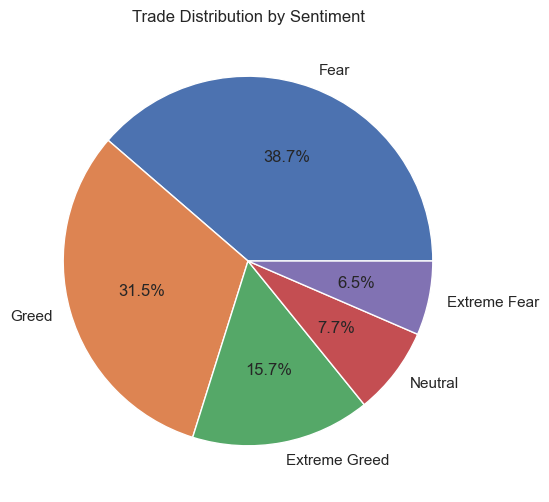

In [413]:
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title='Trade Distribution by Sentiment')
plt.ylabel('')  # hide y-axis label
plt.savefig('sentiment_pie_chart.png', dpi=300)
plt.show()


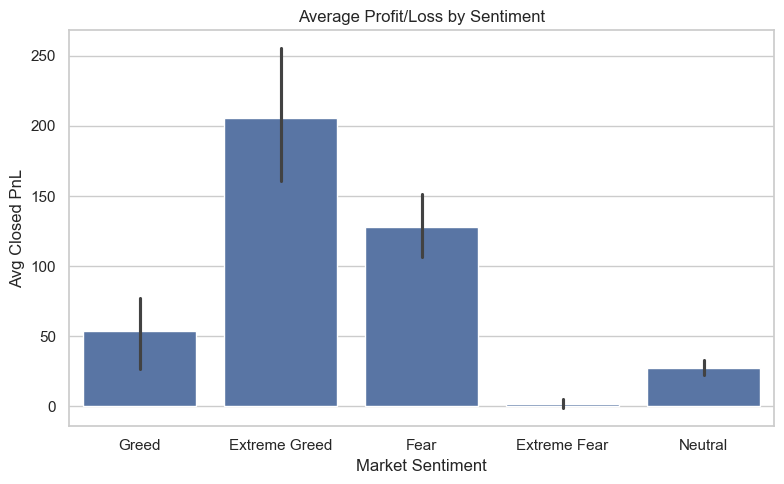

In [414]:
# Average Closed PnL by Sentiment

plt.figure(figsize=(8, 5))
sns.barplot(data=merged_data, x='Sentiment', y='Closed PnL', estimator='mean')
plt.title('Average Profit/Loss by Sentiment')
plt.ylabel('Avg Closed PnL')
plt.xlabel('Market Sentiment')
plt.tight_layout()
plt.show()


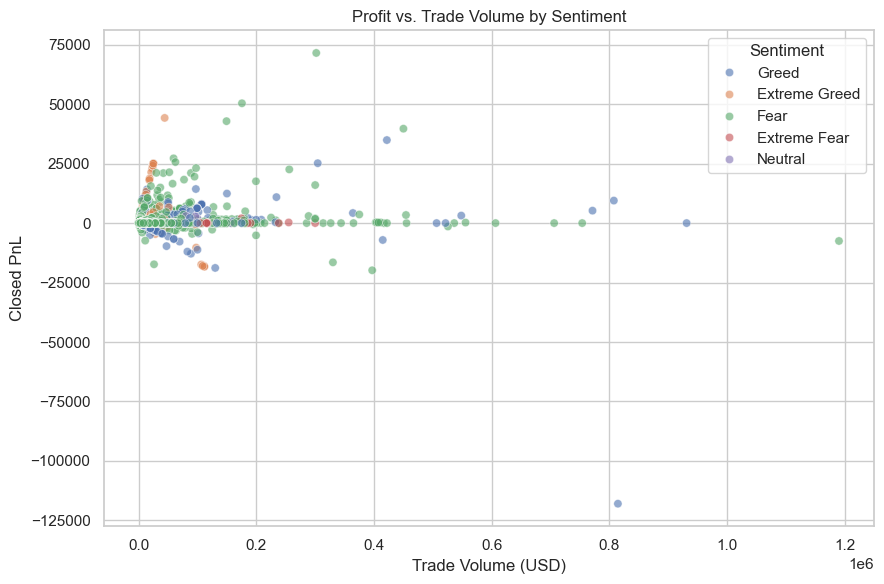

In [415]:
#Profit vs. Trade Volume by Sentiment

plt.figure(figsize=(9, 6))
sns.scatterplot(data=merged_data, x='Size USD', y='Closed PnL', hue='Sentiment', alpha=0.6)
plt.title('Profit vs. Trade Volume by Sentiment')
plt.xlabel('Trade Volume (USD)')
plt.ylabel('Closed PnL')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.savefig('scatter_volume_vs_pnl.png', dpi=300)
plt.show()


In [416]:
# 1. Calculate total Closed PnL per Account
account_pnl = merged_data.groupby('Account')['Closed PnL'].sum().reset_index()

# 2. Create a new column: Profit or Loss
account_pnl['PnL Category'] = account_pnl['Closed PnL'].apply(lambda x: 'Profit' if x > 0 else 'Loss')

# 3. Count how many users fall into each category
pnl_counts = account_pnl['PnL Category'].value_counts().reset_index()
pnl_counts.columns = ['PnL Category', 'Count']


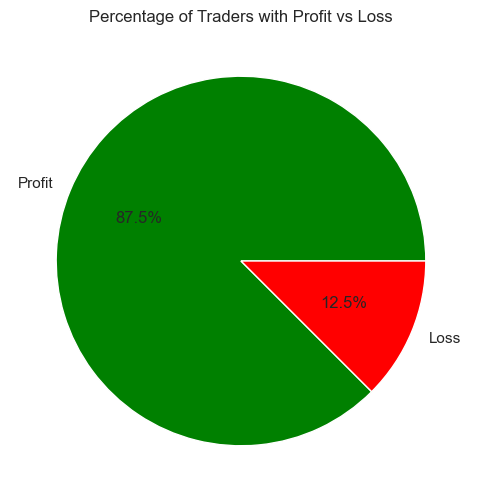

In [417]:
#Percentage of Traders with Profit vs Loss

plt.figure(figsize=(6, 6))
plt.pie(
    pnl_counts['Count'],
    labels=pnl_counts['PnL Category'],
    autopct='%1.1f%%',
    colors=['green', 'red']
)
plt.title('Percentage of Traders with Profit vs Loss')
plt.savefig("profit_vs_loss_pie.png", dpi=300)
plt.show()


In [418]:
# Count of Side (BUY/SELL) grouped by Sentiment
sentiment_side_counts = merged_data.groupby(['Sentiment', 'Side']).size().reset_index(name='Count')

# Calculate percentage within each Sentiment
sentiment_totals = sentiment_side_counts.groupby('Sentiment')['Count'].transform('sum')
sentiment_side_counts['Percentage'] = (sentiment_side_counts['Count'] / sentiment_totals * 100).round(2)

print(sentiment_side_counts)


       Sentiment  Side  Count  Percentage
0   Extreme Fear   BUY   1168       50.21
1   Extreme Fear  SELL   1158       49.79
2  Extreme Greed   BUY   1661       29.55
3  Extreme Greed  SELL   3960       70.45
4           Fear   BUY   7307       52.69
5           Fear  SELL   6562       47.31
6          Greed   BUY   5407       47.88
7          Greed  SELL   5885       52.12
8        Neutral   BUY   1020       37.01
9        Neutral  SELL   1736       62.99


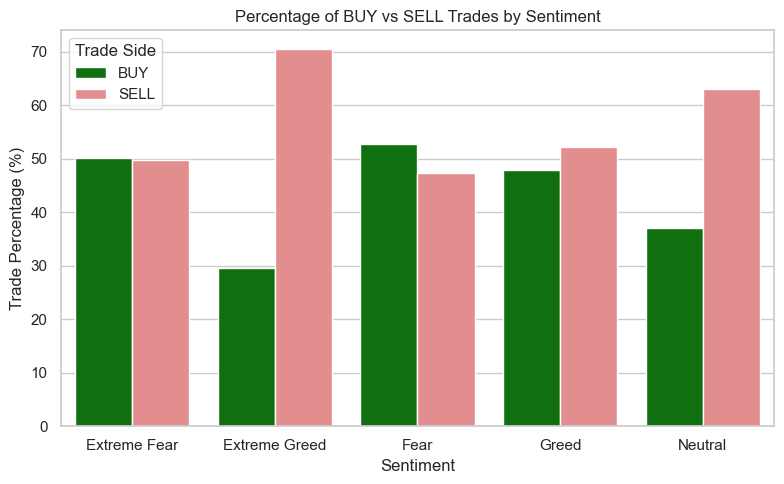

In [419]:
#Percentage of BUY vs SELL Trades by Sentiment

# Define custom color mapping
custom_colors = {'BUY': 'green', 'SELL': 'lightcoral'}

plt.figure(figsize=(8, 5))
sns.barplot(
    data=sentiment_side_counts,
    x='Sentiment',
    y='Percentage',
    hue='Side',
    palette=custom_colors  # Apply custom colors
)

plt.title('Percentage of BUY vs SELL Trades by Sentiment')
plt.ylabel('Trade Percentage (%)')
plt.xlabel('Sentiment')
plt.legend(title='Trade Side')
plt.tight_layout()
plt.savefig('buy_sell_percent_by_sentiment.png', dpi=300)
plt.show()


In [420]:
# Step 1: Add PnL Category to merged_data
account_pnl = merged_data.groupby('Account')['Closed PnL'].sum().reset_index()
account_pnl['PnL Category'] = account_pnl['Closed PnL'].apply(lambda x: 'Profit' if x > 0 else 'Loss')
merged_with_label = pd.merge(merged_data, account_pnl[['Account', 'PnL Category']], on='Account')

# Step 2: For each sentiment, count unique traders in Profit and Loss categories
sentiment_trader_counts = (
    merged_with_label.groupby(['Sentiment', 'PnL Category'])['Account']
    .nunique()
    .reset_index(name='Trader Count')
)

# Step 3: Convert to percentages over total unique traders
total_traders = merged_with_label['Account'].nunique()
sentiment_trader_counts['Percentage of All Traders'] = (sentiment_trader_counts['Trader Count'] / total_traders) * 100


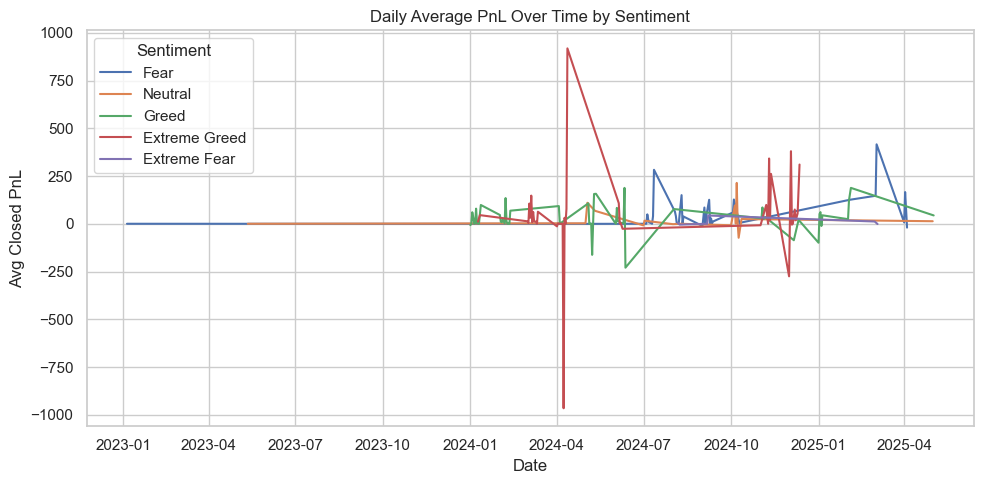

In [421]:
#Daily Average PnL Over Time by Sentiment

daily_avg = merged_data.groupby(['Date', 'Sentiment'])['Closed PnL'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=daily_avg, x='Date', y='Closed PnL', hue='Sentiment')
plt.title('Daily Average PnL Over Time by Sentiment')
plt.xlabel('Date')
plt.ylabel('Avg Closed PnL')
plt.tight_layout()
plt.savefig('daily_avg_pnl_by_sentiment.png', dpi=300)
plt.show()


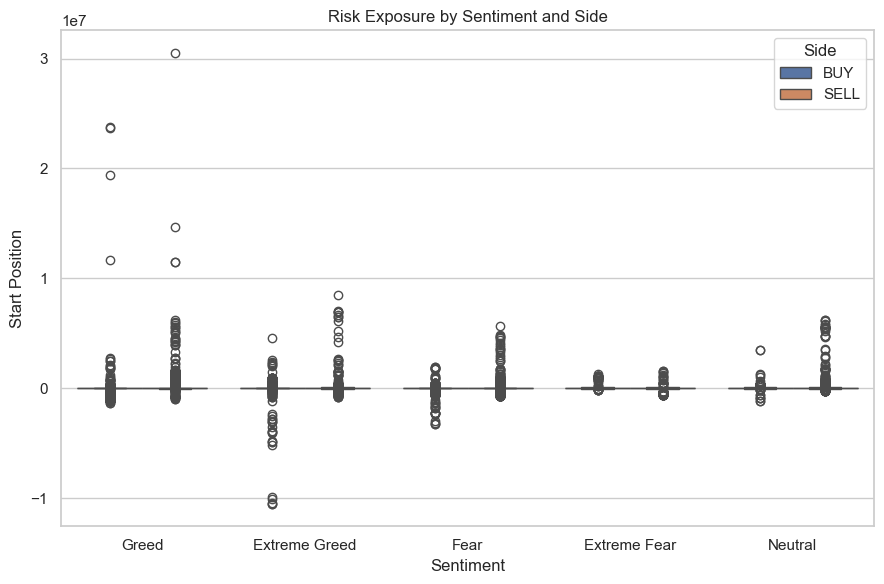

In [422]:
#Risk Exposure by Sentiment and Side

plt.figure(figsize=(9, 6))
sns.boxplot(data=merged_data, x='Sentiment', y='Start Position', hue='Side')
plt.title('Risk Exposure by Sentiment and Side')
plt.tight_layout()
plt.savefig('start_position_by_sentiment_side.png', dpi=300)
plt.show()


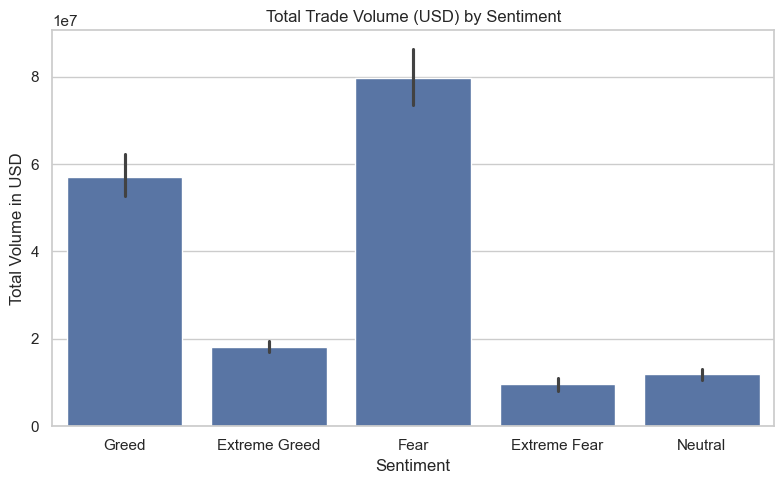

In [423]:
#Total Trade Volume (USD) by Sentiment

plt.figure(figsize=(8, 5))
sns.barplot(data=merged_data, x='Sentiment', y='Size USD', estimator='sum')
plt.title('Total Trade Volume (USD) by Sentiment')
plt.ylabel('Total Volume in USD')
plt.tight_layout()
plt.show()


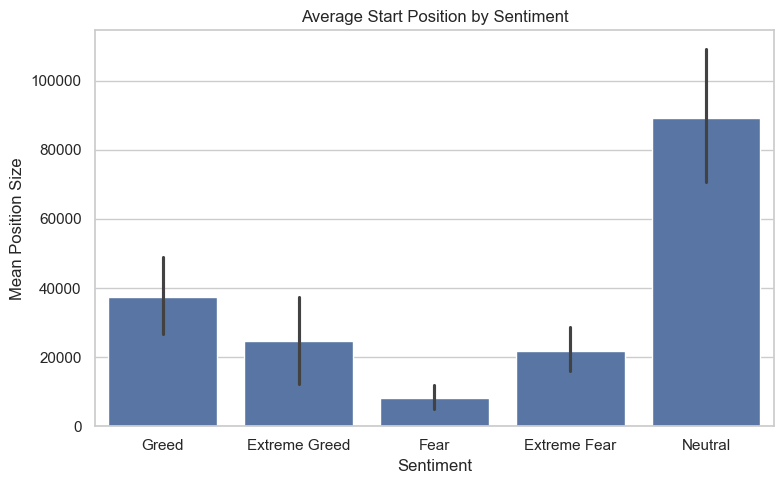

In [424]:
#Average Start Position by Sentiment

plt.figure(figsize=(8, 5))
sns.barplot(data=merged_data, x='Sentiment', y='Start Position', estimator='mean')
plt.title('Average Start Position by Sentiment')
plt.ylabel('Mean Position Size')
plt.tight_layout()
plt.show()


In [425]:
# 1. Group by Account and Sentiment, sum Closed PnL
account_sentiment_pnl = (
    merged_data.groupby(['Account', 'Sentiment'])['Closed PnL']
    .sum()
    .reset_index()
)

# 2. Pivot it: Accounts as rows, Sentiment as columns
heatmap_data = account_sentiment_pnl.pivot(index='Account', columns='Sentiment', values='Closed PnL')

# 3. Fill NaNs with 0 (in case some accounts didn't trade in all sentiments)
heatmap_data = heatmap_data.fillna(0)


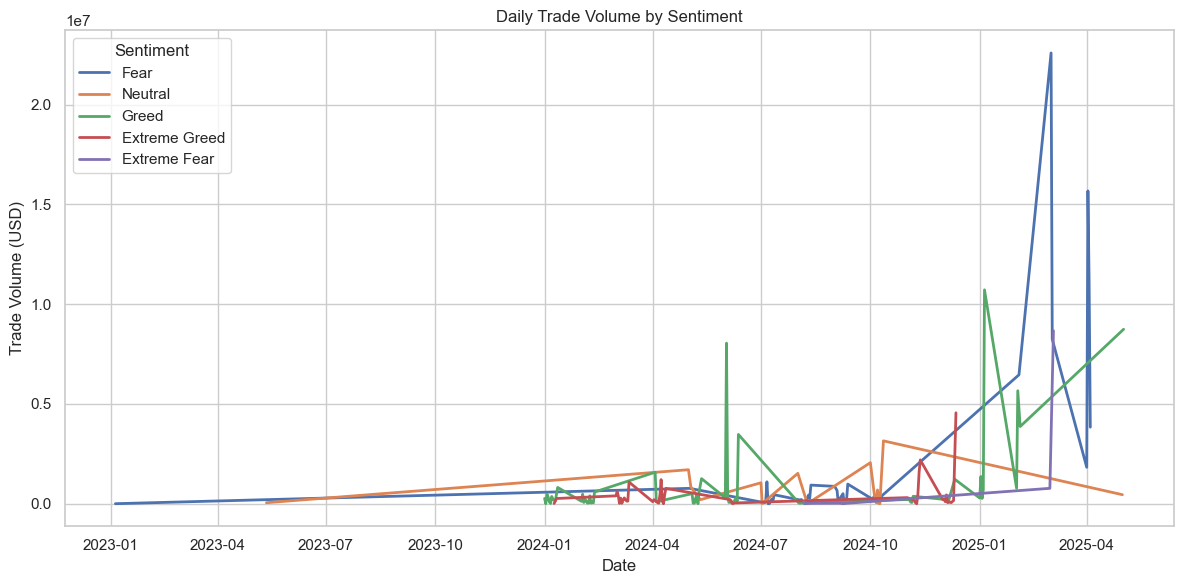

In [426]:
# Group by Date and Sentiment, sum trade volume
daily_volume = merged_data.groupby(['Date', 'Sentiment'])['Size USD'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_volume, x='Date', y='Size USD', hue='Sentiment', linewidth=2)

plt.title('Daily Trade Volume by Sentiment')
plt.xlabel('Date')
plt.ylabel('Trade Volume (USD)')
plt.tight_layout()
plt.savefig("trade_volume_trend_by_sentiment.png", dpi=300)
plt.show()


In [427]:
merged_data.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,Sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,Greed
